# Exploratory Analysis

In [101]:
# import necessary libraries
import numpy as np
import pandas as pd
import re
from datetime import datetime
import json
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [150]:
# Import dataset 
private_data = "../datasets/cleaned/cleaned_private.csv"

df = pd.read_csv(private_data, quotechar='"', escapechar='\\', thousands=',')

In [103]:
# remove outlier function
def removeoutlier(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = (series < lower_bound) | (series > upper_bound)
    clean = series[~outliers]
    clean = pd.DataFrame(clean)
    return clean

## Uni-Variate Analysis

### Housing Price Distribution
- Housing prices can be analysed both as Price Per Unit and Price Per Square Foot.

In [106]:
# Summary statistics of Price Per Unit
pd.set_option('display.float_format', '{:,.4f}'.format)
unitprice = pd.DataFrame(df['Price'])
removeoutlier(unitprice).describe()

,Price
count,"118,326.0000"
mean,"1,652,538.4691"
std,"700,379.8847"
min,"320,000.0000"
25%,"1,153,800.0000"
50%,"1,497,000.0000"
75%,"1,995,672.0000"
max,"3,822,000.0000"


<Axes: ylabel='Density'>

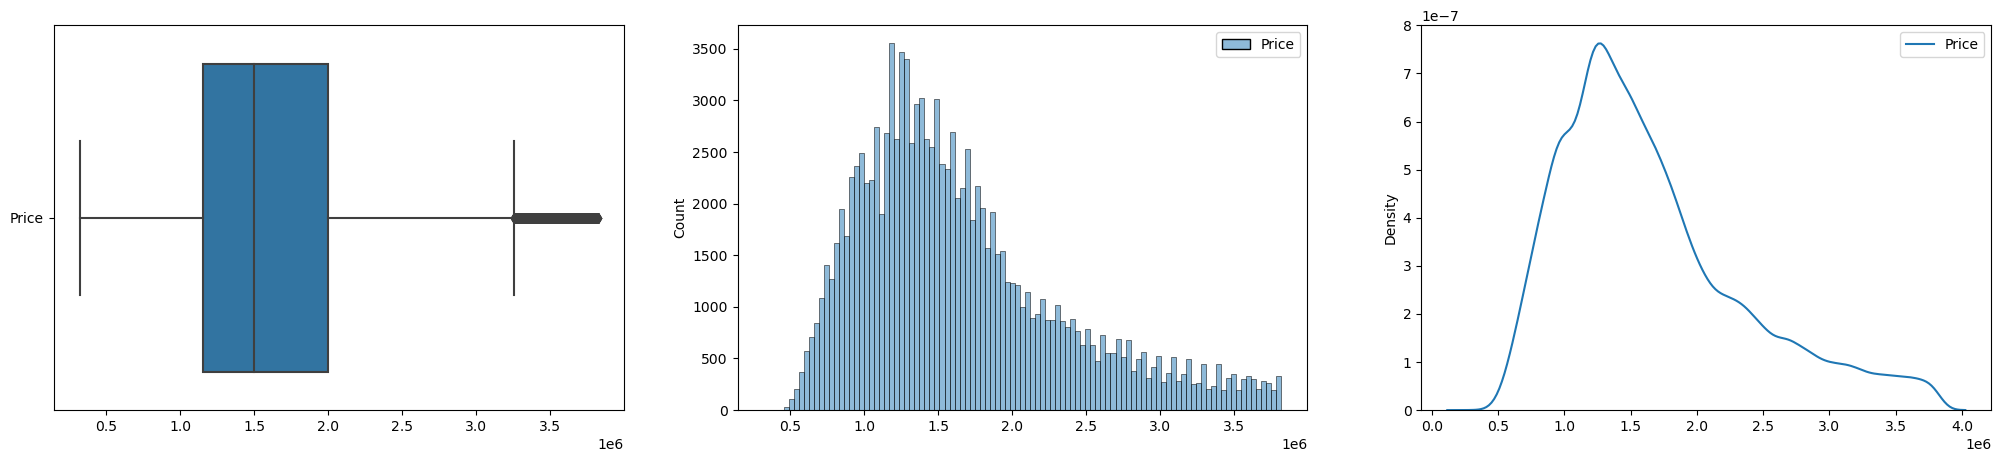

In [107]:
# Plot the basic uni-variate figures for Price Per Unit
f, axes = plt.subplots(1, 3, figsize=(25, 5))
sb.boxplot(data = removeoutlier(unitprice), orient = "h", ax = axes[0])
sb.histplot(data = removeoutlier(unitprice), ax = axes[1])
sb.kdeplot(data = removeoutlier(unitprice), ax = axes[2])

In [108]:
# Summary statistics of Price Per Square Foot 
psf = pd.DataFrame(df['Unit Price ($ PSF)'])
removeoutlier(psf).describe()

,Unit Price ($ PSF)
count,"127,164.0000"
mean,"1,678.2046"
std,563.1990
min,120.0000
25%,"1,251.0000"
50%,"1,598.0000"
75%,"2,052.0000"
max,"3,294.0000"


<Axes: ylabel='Density'>

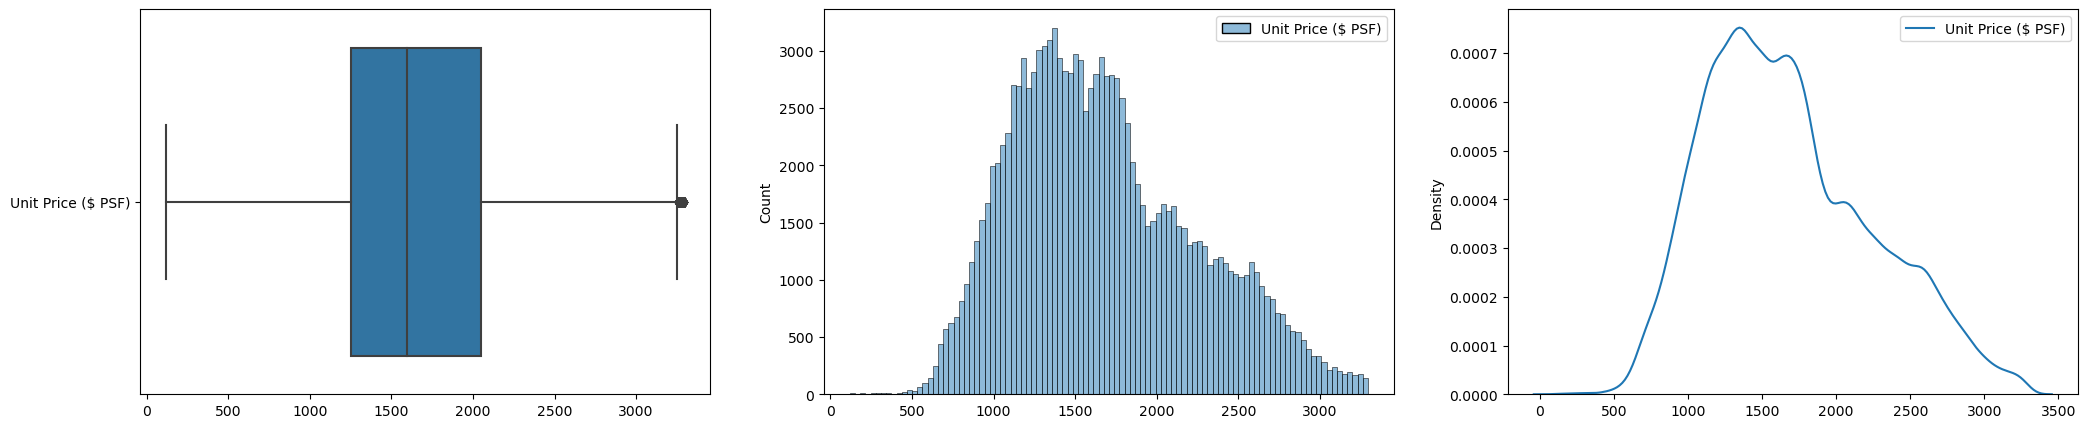

In [109]:
# Plot the basic uni-variate figures for Price Per Square Foot 
f, axes = plt.subplots(1, 3, figsize=(25, 5))
sb.boxplot(data = removeoutlier(psf), orient = "h", ax = axes[0])
sb.histplot(data = removeoutlier(psf), ax = axes[1])
sb.kdeplot(data = removeoutlier(psf), ax = axes[2])

### Numerical Data Analysis

In [111]:
# Summary statistics of Area (SQFT)
area = pd.DataFrame(df['Area (SQFT)'])
removeoutlier(area).describe()

,Area (SQFT)
count,"118,193.0000"
mean,"1,023.4634"
std,385.8534
min,258.3400
25%,721.1900
50%,979.5200
75%,"1,248.6200"
max,"2,238.9100"


<Axes: ylabel='Density'>

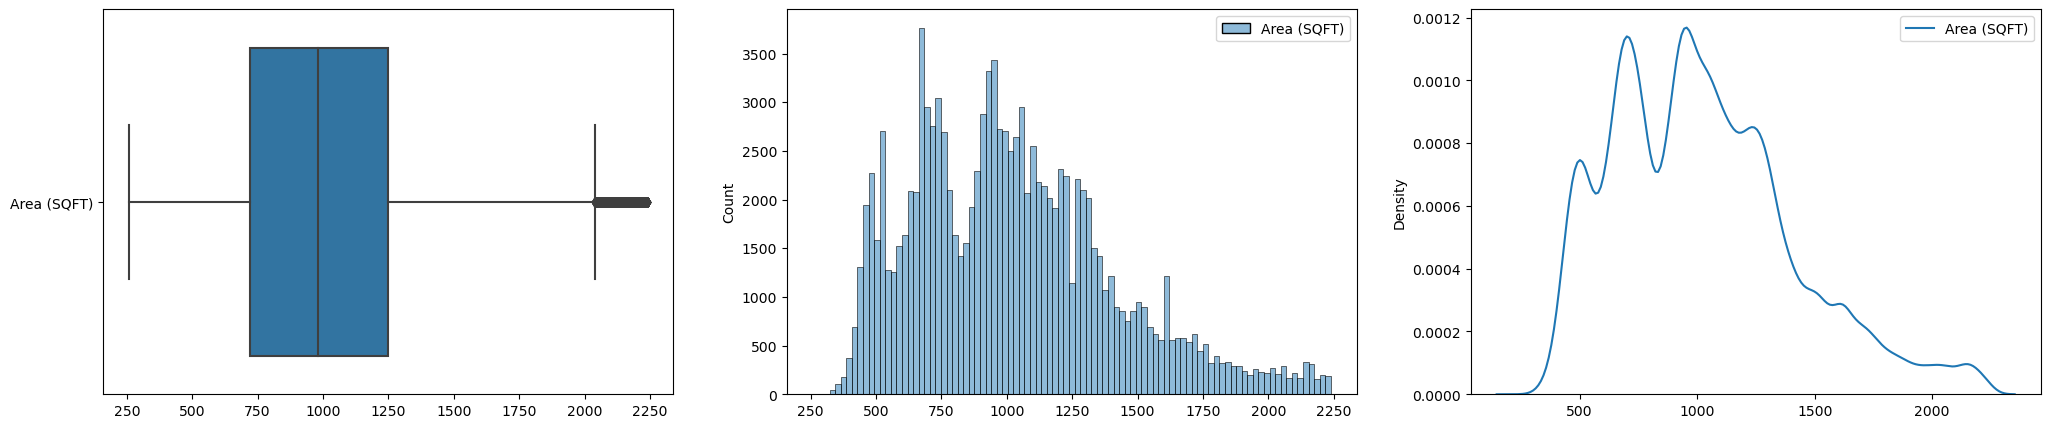

In [112]:
# Plot the basic uni-variate figures for Area (SQFT)
f, axes = plt.subplots(1, 3, figsize=(25, 5))
sb.boxplot(data = removeoutlier(area), orient = "h", ax = axes[0])
sb.histplot(data = removeoutlier(area), ax = axes[1])
sb.kdeplot(data = removeoutlier(area), ax = axes[2])

In [113]:
# Summary statistics of Remaining Lease Years
remainingleaseyears = pd.DataFrame(df['Remaining Lease Years'])
removeoutlier(remainingleaseyears).describe()

,Remaining Lease Years
count,"128,349.0000"
mean,376.3370
std,422.5648
min,10.0000
25%,89.0000
50%,97.0000
75%,999.0000
max,999.0000


<Axes: ylabel='Density'>

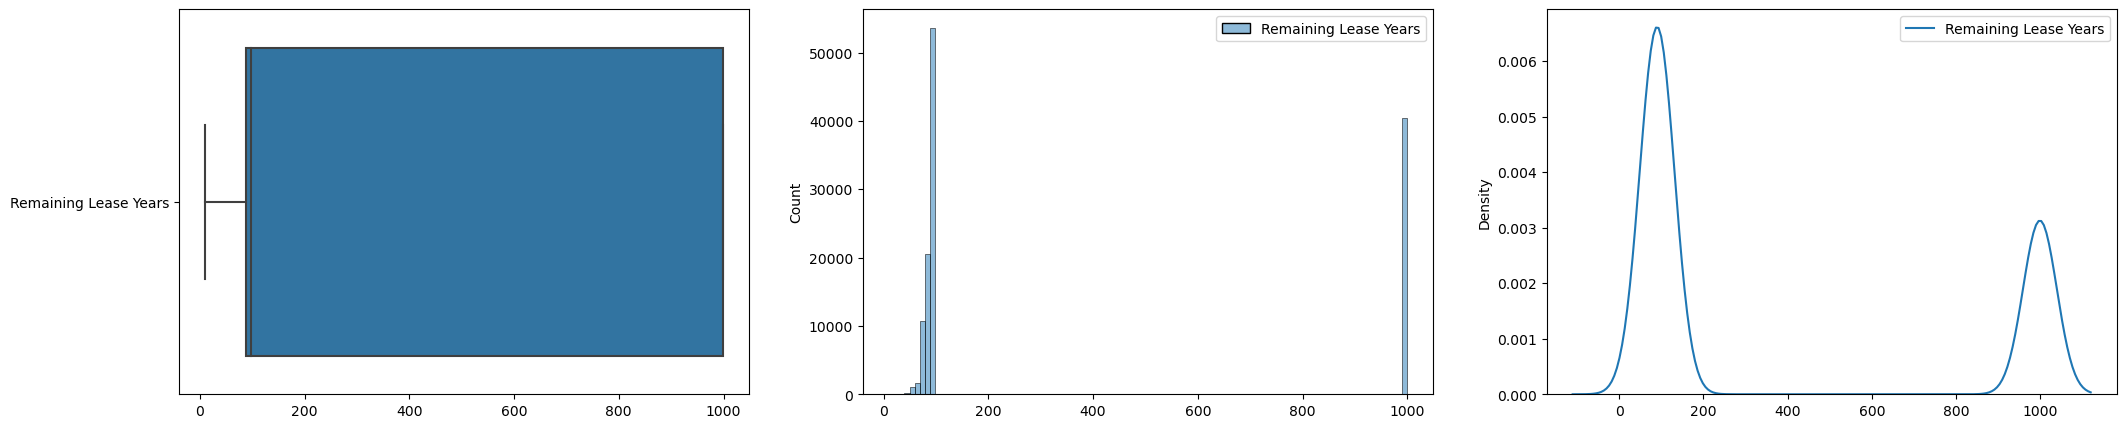

In [114]:
# Plot the basic uni-variate figures for Remaining Lease Years
f, axes = plt.subplots(1, 3, figsize=(25, 5))
sb.boxplot(data = removeoutlier(remainingleaseyears), orient = "h", ax = axes[0])
sb.histplot(data = removeoutlier(remainingleaseyears), bins=100, ax=axes[1])
sb.kdeplot(data = removeoutlier(remainingleaseyears), ax = axes[2])

From the visualisations of the Remaining Lease Years, we can see that 999 years is a significant outlier. Specifically, 87,887 out of the 128,349 data points for remaining lease years range between 10 to 106 years. Therefore, we will exclude the 999 years from the dataset in order to conduct more meaningful numerical data visualizations for the other years.

In [116]:
# Summary statistics of Remaining Lease Years (Excl. 999yrs)
remainingleaseyears_nonfreehold = pd.DataFrame(df[df['Remaining Lease Years'] != 999]['Remaining Lease Years'])
remainingleaseyears_nonfreehold.describe()

,Remaining Lease Years
count,"87,887.0000"
mean,89.6713
std,9.6271
min,10.0000
25%,86.0000
50%,92.0000
75%,97.0000
max,106.0000


<Axes: ylabel='Density'>

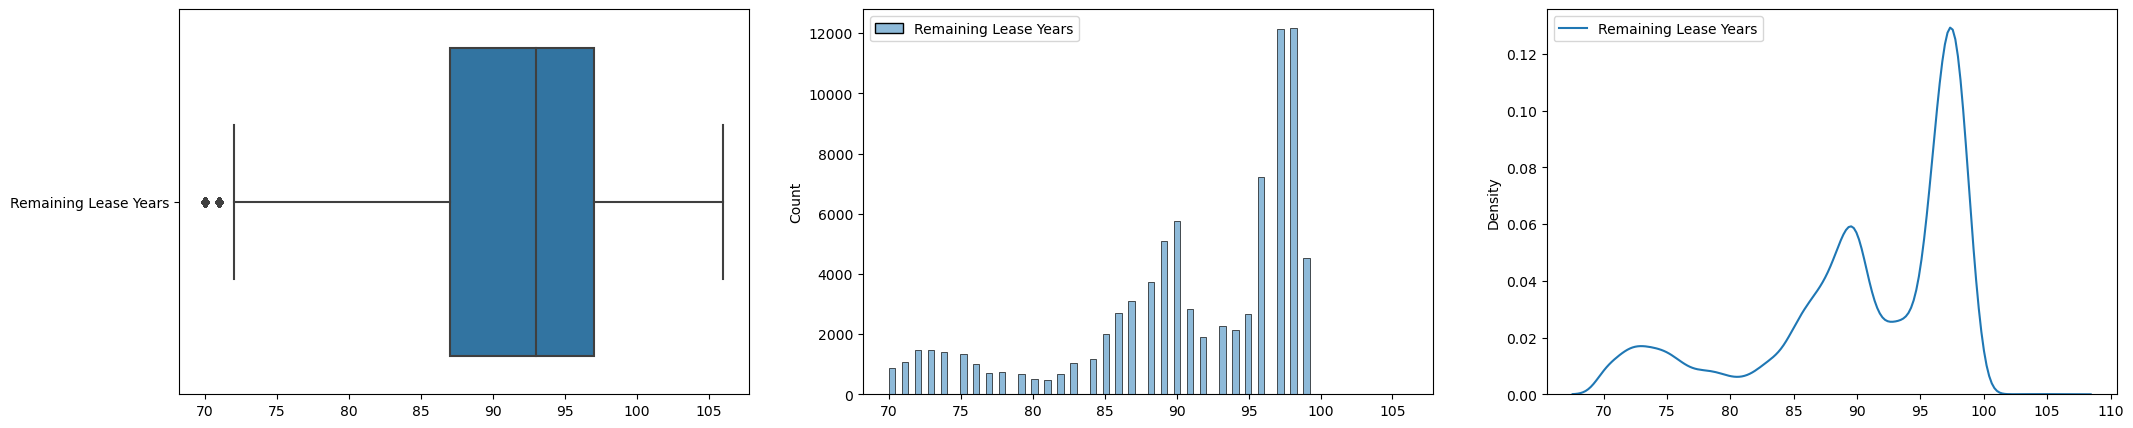

In [117]:
# Plot the basic uni-variate figures for Remaining Lease Years (Excl. 999yrs)
f, axes = plt.subplots(1, 3, figsize=(25, 5))
sb.boxplot(data = removeoutlier(remainingleaseyears_nonfreehold), orient = "h", ax = axes[0])
sb.histplot(data = removeoutlier(remainingleaseyears_nonfreehold), ax=axes[1])
sb.kdeplot(data = removeoutlier(remainingleaseyears_nonfreehold), ax = axes[2])

### Categorical Data Analysis

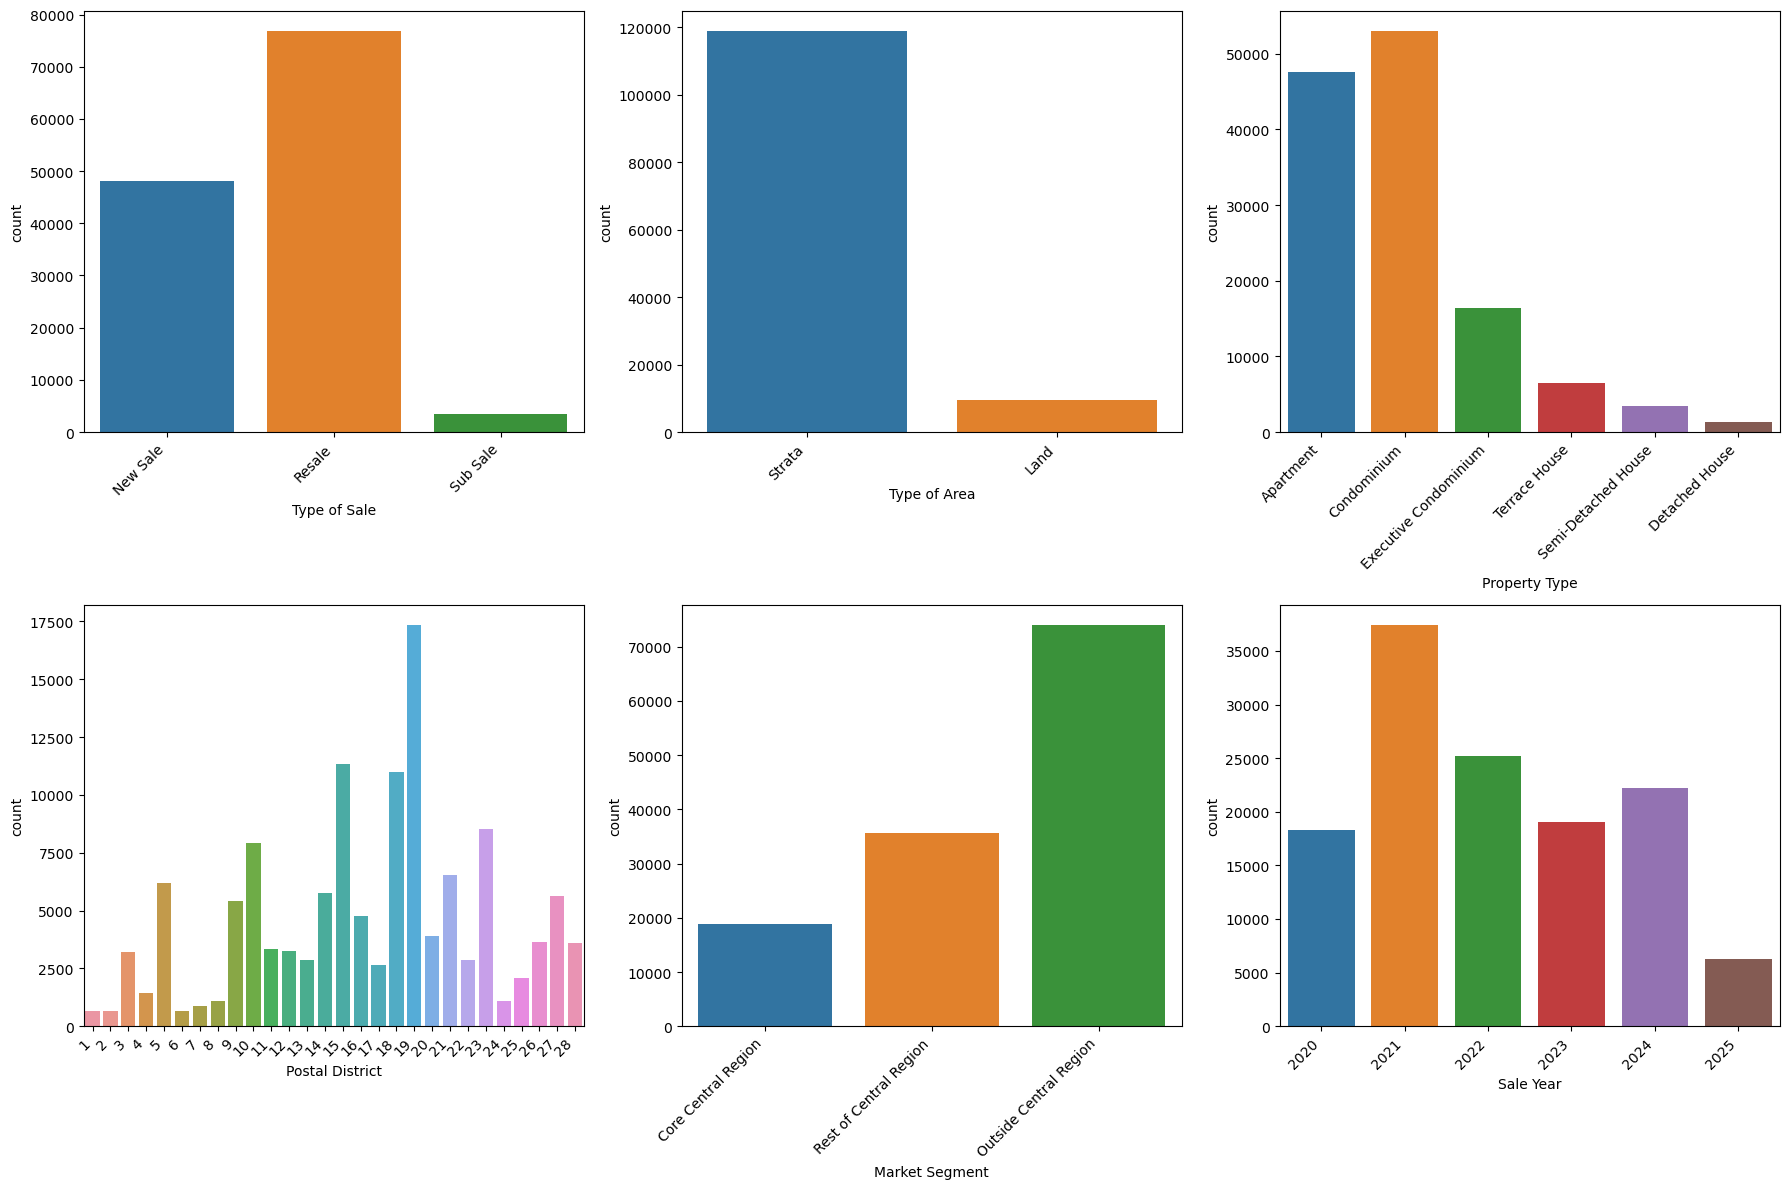

In [119]:
# Extract relevant categorical variables
saletype = pd.DataFrame(df['Type of Sale'])
areatype = pd.DataFrame(df['Type of Area'])
propertytype = pd.DataFrame(df['Property Type'])
postaldistrict = pd.DataFrame(df['Postal District'])
marketsegment = pd.DataFrame(df['Market Segment'])
saleyear = pd.DataFrame(df['Sale Year'])
remainingleaseyears = pd.DataFrame(df['Remaining Lease Years'])

# Create a figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot count plots for categorical variables
sb.countplot(data=saletype, x='Type of Sale', ax=axes[0, 0])
sb.countplot(data=areatype, x='Type of Area', ax=axes[0, 1])
sb.countplot(data=propertytype, x='Property Type', ax=axes[0, 2])
sb.countplot(data=postaldistrict, x='Postal District', ax=axes[1, 0])
sb.countplot(data=marketsegment, x='Market Segment', ax=axes[1, 1])
sb.countplot(data=saleyear, x='Sale Year', ax=axes[1, 2])

# Rotate x-axis labels for better readability (for variables with many categories)
for ax in axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Adjust layout
plt.tight_layout()
plt.show()


# Bivariate analysis

Price against Area for different property types

/Users/andria/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/andria/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/andria/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/andria/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/andria/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/andria/anaconda3/lib/python3.11/s

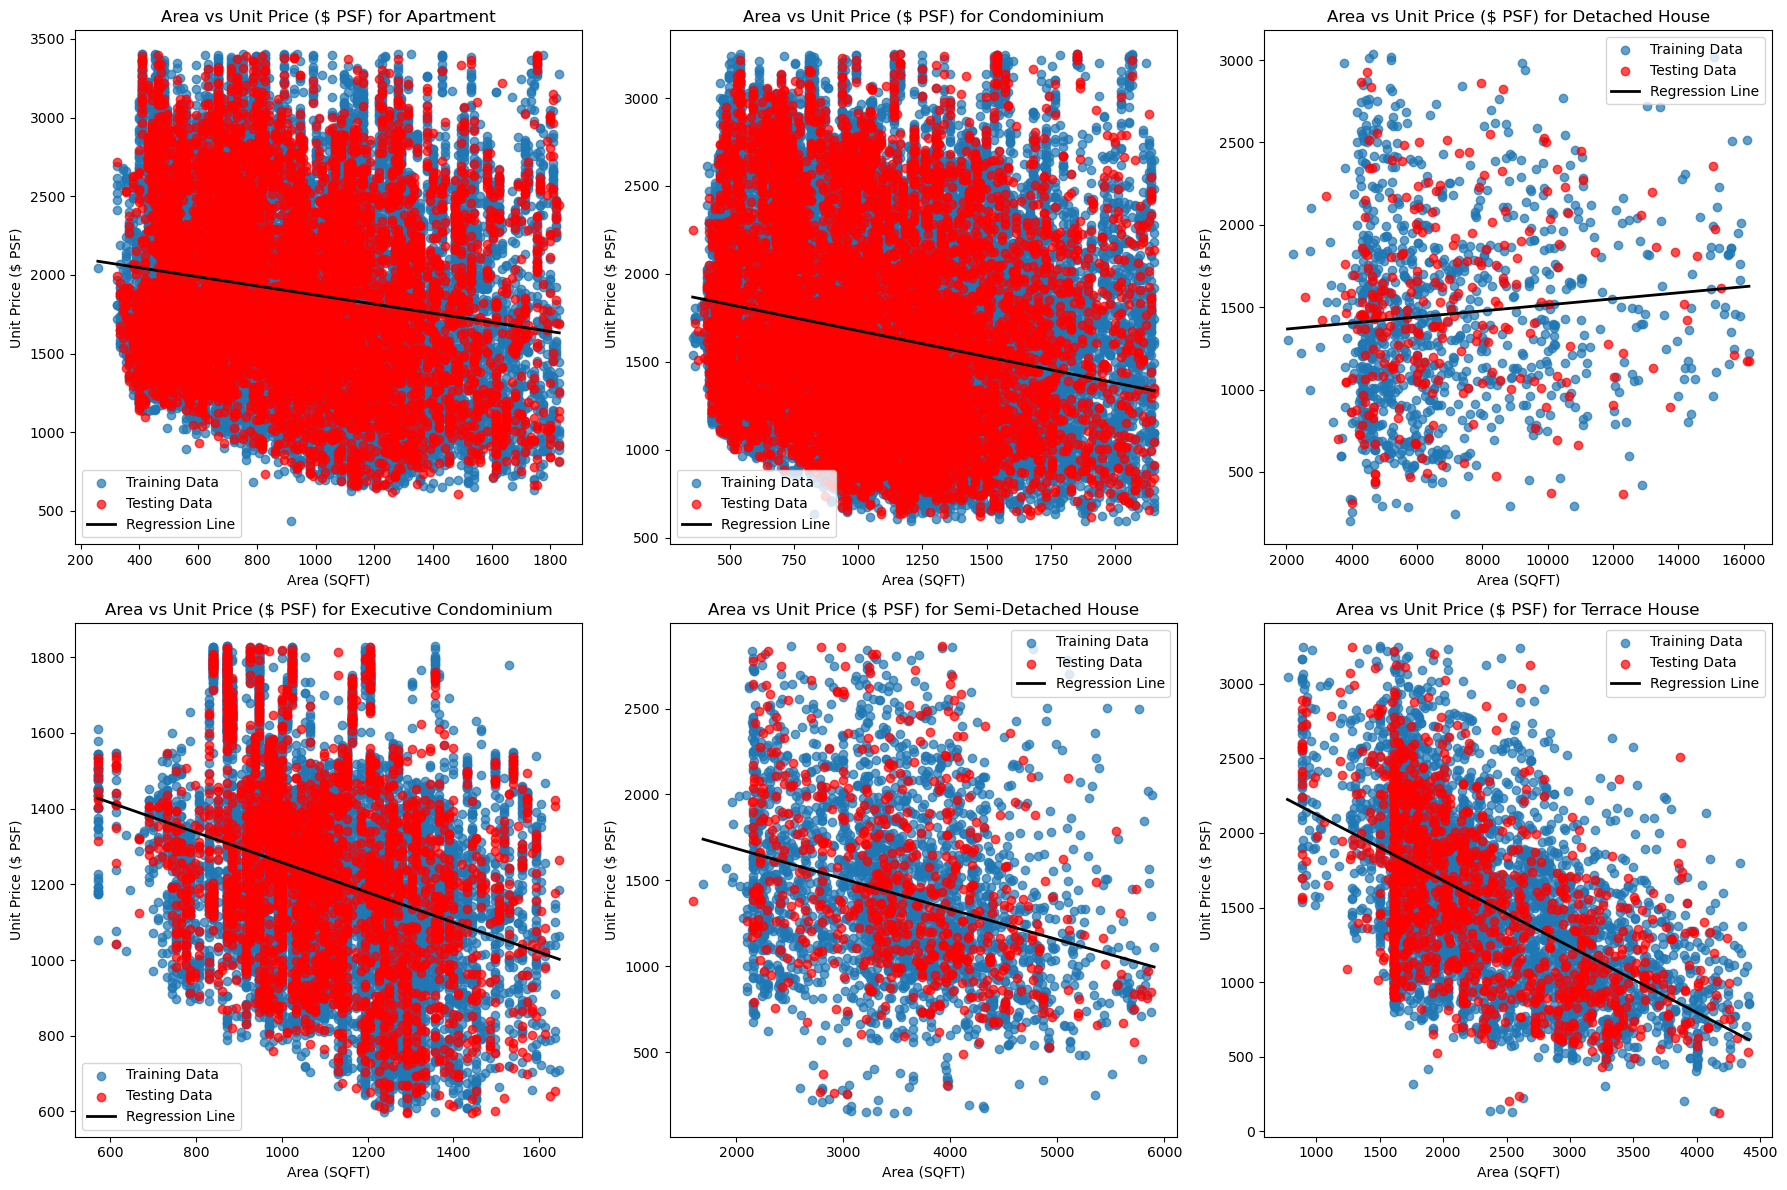


R² Scores for Each Property Type:
Apartment: R² = 0.0316
Condominium: R² = 0.0393
Detached House: R² = 0.0083
Executive Condominium: R² = 0.0925
Semi-Detached House: R² = 0.0848
Terrace House: R² = 0.2976


In [122]:
# Define property types to analyze
property_types = [
    "Apartment", "Condominium", "Detached House",
    "Executive Condominium", "Semi-Detached House", "Terrace House"
]
r2_scores = {} 
# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # 2 rows, 3 columns
axes = axes.flatten()  # Flatten the axes array

for i, prop_type in enumerate(property_types):
    df1 = df[df['Property Type'] == prop_type].copy()

    # Remove outliers
    df1_filtered = df1.copy()
    df1_filtered['Unit Price ($ PSF)'] = removeoutlier(df1_filtered['Unit Price ($ PSF)'])
    df1_filtered['Area (SQFT)'] = removeoutlier(df1_filtered['Area (SQFT)'])
    
    # Drop rows with NaN in Area and Price
    df1_filtered = df1_filtered.dropna(subset=['Unit Price ($ PSF)', 'Area (SQFT)'])

    # Check if enough data remains after outlier removal
    if df1_filtered.shape[0] == 0:
        print(f"Not enough data for {prop_type} after outlier removal. Using original data.")
        df1_filtered = df1.copy().dropna(subset=['Unit Price ($ PSF)', 'Area (SQFT)'])  # Use original data

    # Prepare training data
    area = df1_filtered[['Area (SQFT)']]
    price = df1_filtered[['Unit Price ($ PSF)']]

    # Ensure no NaN values remain
    if area.isna().sum().sum() > 0 or price.isna().sum().sum() > 0:
        print(f"Skipping {prop_type} due to NaN values after cleaning.")
        continue

    # Ensure at least 2 rows for train-test split
    if area.shape[0] < 2:
        print(f"Skipping {prop_type} due to insufficient data.")
        continue

    # Train-test split
    area_train, area_test, price_train, price_test = train_test_split(area, price, test_size=0.2, random_state=42)

    # Train Linear Regression model
    linreg = LinearRegression()
    linreg.fit(area_train, price_train)

    r2_score = linreg.score(area_train, price_train)
    r2_scores[prop_type] = r2_score

    # Predictions for regression line
    area_range = np.linspace(area_train.min(), area_train.max(), 100).reshape(-1, 1)
    price_pred = linreg.predict(area_range)

    # Plot scatter and regression line
    ax = axes[i]
    ax.scatter(area_train, price_train, label="Training Data", alpha=0.7)
    ax.scatter(area_test, price_test, color="r", label="Testing Data", alpha=0.7)
    ax.plot(area_range, price_pred, color="black", linewidth=2, label="Regression Line")

    # Set labels and title
    ax.set_xlabel("Area (SQFT)")
    ax.set_ylabel("Unit Price ($ PSF)")
    ax.set_title(f"Area vs Unit Price ($ PSF) for {prop_type}")
    ax.legend()

plt.tight_layout()
plt.show()


print("\nR² Scores for Each Property Type:")
for prop_type, r2 in r2_scores.items():
    print(f"{prop_type}: R² = {r2:.4f}")

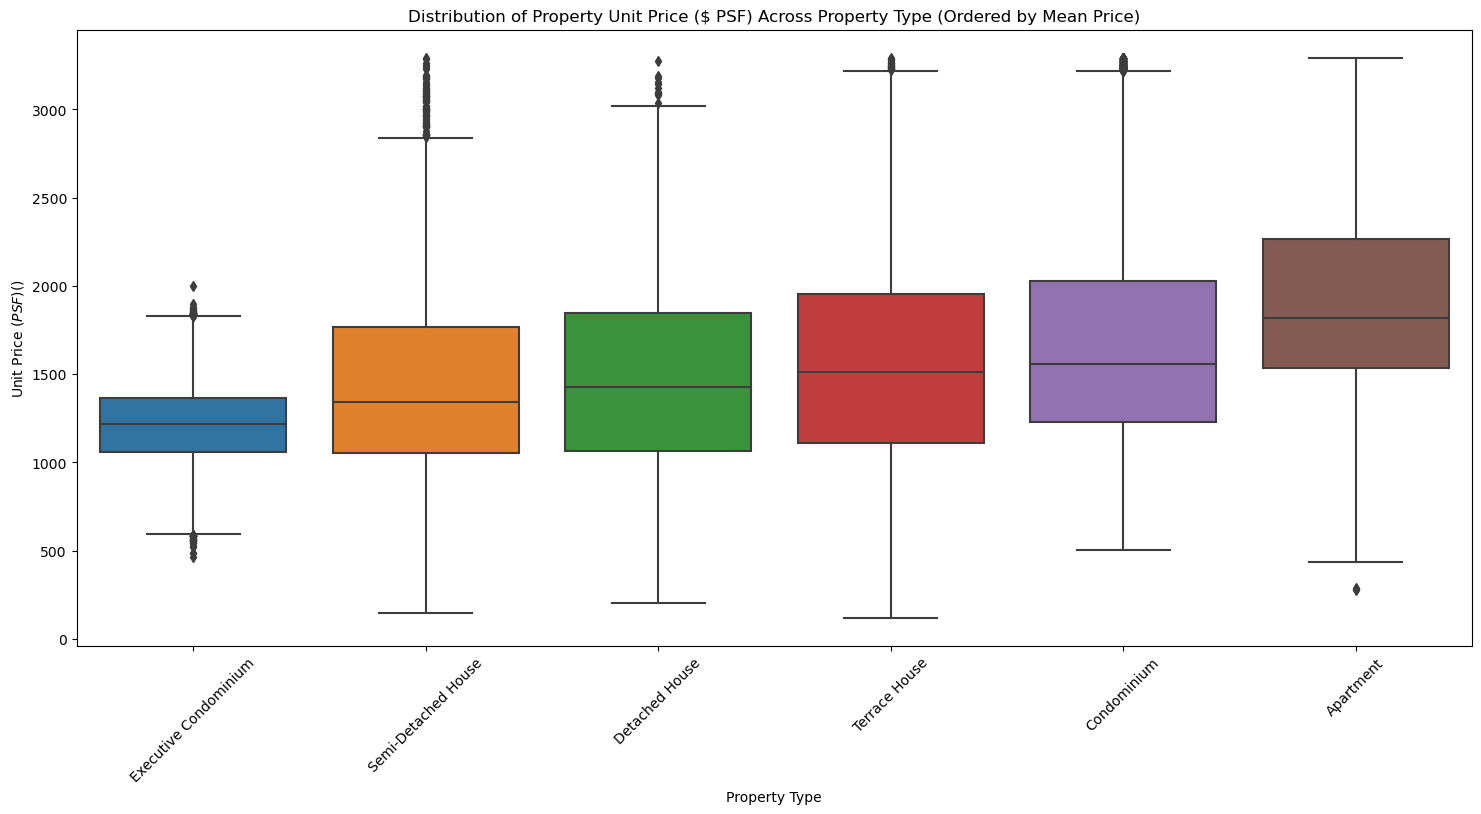

In [123]:
# Remove outliers from Price
df_filtered = df.copy()
df_filtered['Unit Price ($ PSF)'] = removeoutlier(df_filtered['Unit Price ($ PSF)'])

# Drop rows with NaN values in Price and Postal District
df_filtered = df_filtered.dropna(subset=['Unit Price ($ PSF)', 'Property Type'])

# Convert Postal District to string for categorical plotting
df_filtered['Property Type'] = df_filtered['Property Type'].astype(str)

# Calculate mean prices per district and sort them
district_order = df_filtered.groupby("Property Type")["Unit Price ($ PSF)"].mean().sort_values().index

# Set figure size
plt.figure(figsize=(18, 8))

# Create boxplot, ordered by mean price
sb.boxplot(x='Property Type', y='Unit Price ($ PSF)', data=df_filtered, order=district_order)

# Customize labels and title
plt.xlabel("Property Type")
plt.ylabel("Unit Price ($ PSF) ($)")
plt.title("Distribution of Property Unit Price ($ PSF) Across Property Type (Ordered by Mean Price)")

# Rotate district labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.show()

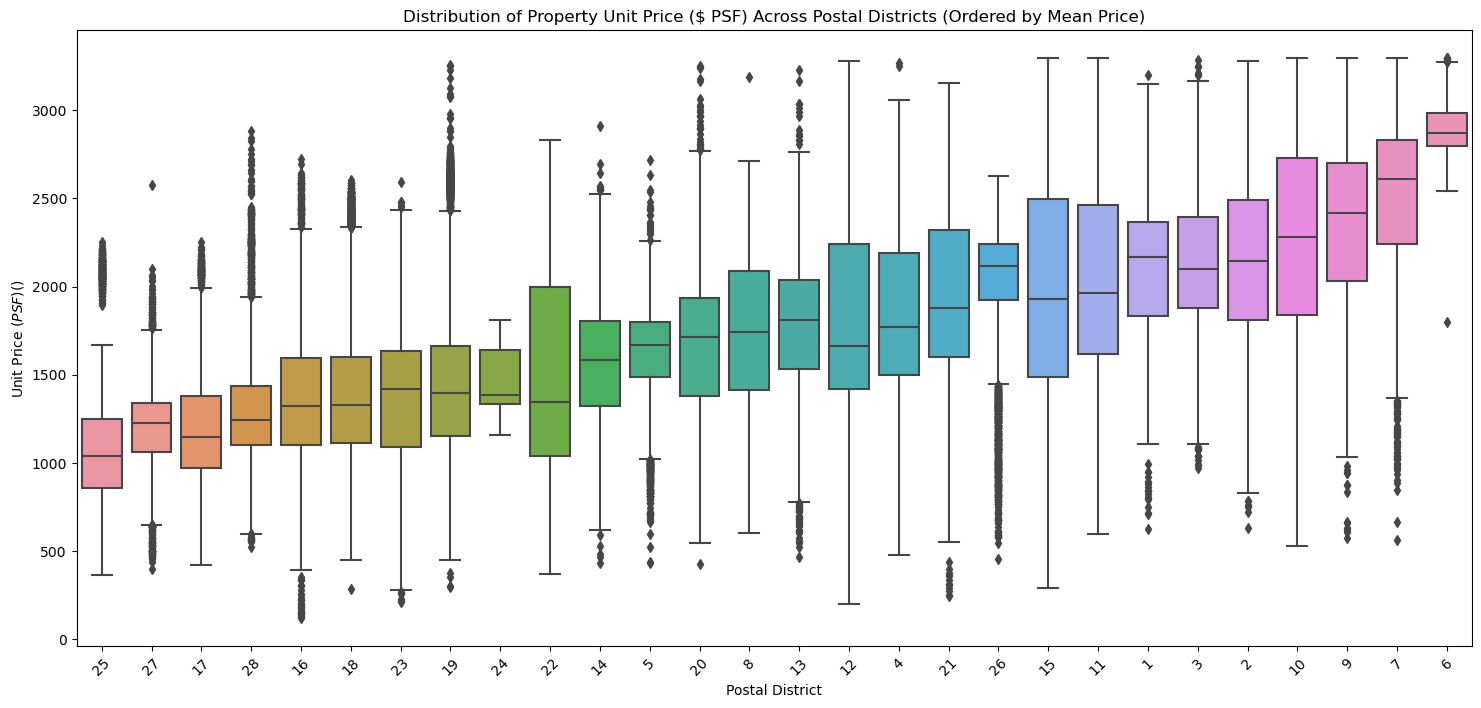

In [124]:
# Remove outliers from Price
df_filtered = df.copy()
df_filtered['Unit Price ($ PSF)'] = removeoutlier(df_filtered['Unit Price ($ PSF)'])

# Drop rows with NaN values in Price and Postal District
df_filtered = df_filtered.dropna(subset=['Unit Price ($ PSF)', 'Postal District'])

# Convert Postal District to string for categorical plotting
df_filtered['Postal District'] = df_filtered['Postal District'].astype(str)

# Calculate mean prices per district and sort them
district_order = df_filtered.groupby("Postal District")["Unit Price ($ PSF)"].mean().sort_values().index

# Set figure size
plt.figure(figsize=(18, 8))

# Create boxplot, ordered by mean price
sb.boxplot(x='Postal District', y='Unit Price ($ PSF)', data=df_filtered, order=district_order)

# Customize labels and title
plt.xlabel("Postal District")
plt.ylabel("Unit Price ($ PSF) ($)")
plt.title("Distribution of Property Unit Price ($ PSF) Across Postal Districts (Ordered by Mean Price)")

# Rotate district labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.show()


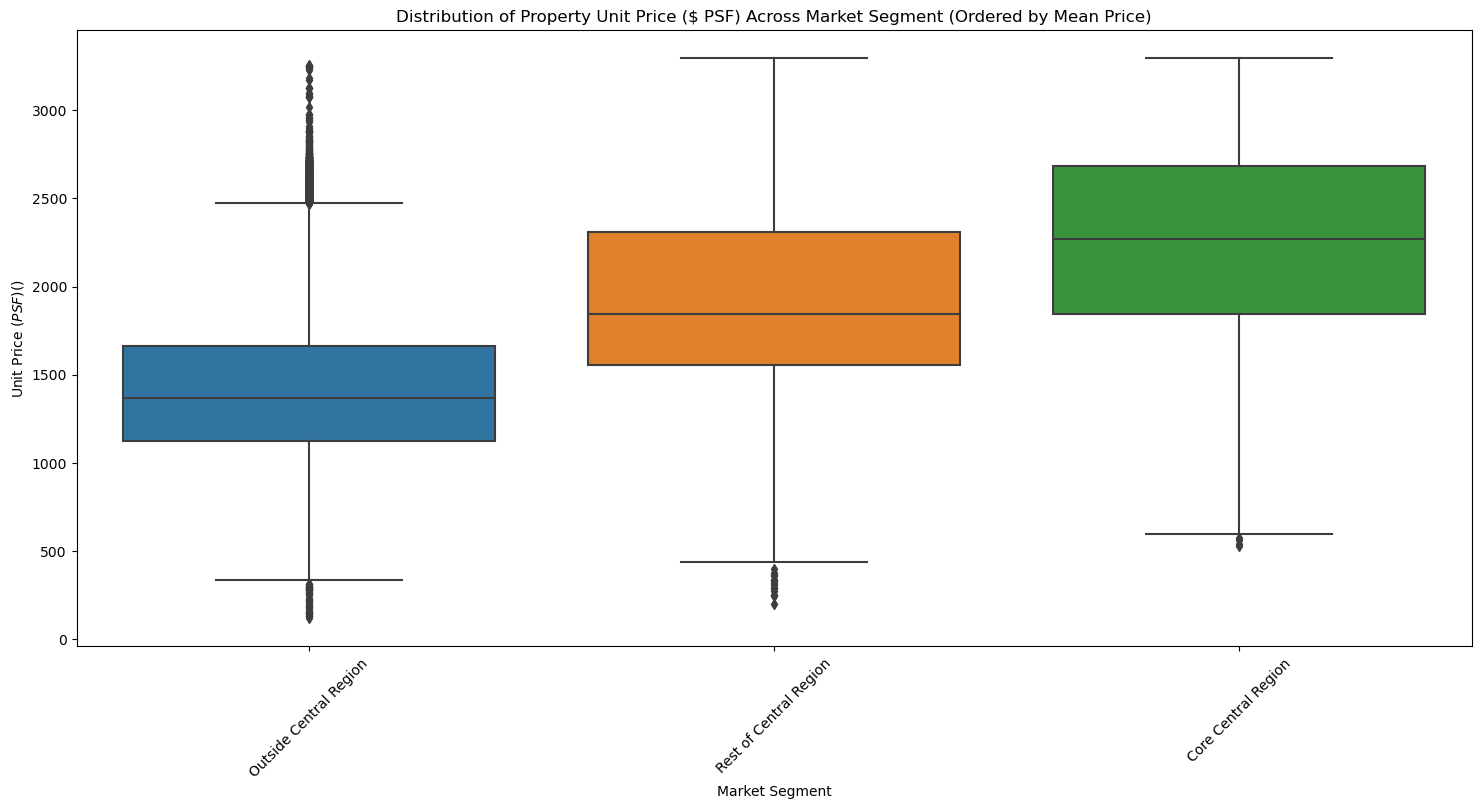

In [125]:
# Remove outliers from Price
df_filtered = df.copy()
df_filtered['Unit Price ($ PSF)'] = removeoutlier(df_filtered['Unit Price ($ PSF)'])

# Drop rows with NaN values in Price and Postal District
df_filtered = df_filtered.dropna(subset=['Unit Price ($ PSF)', 'Market Segment'])

# Convert Postal District to string for categorical plotting
df_filtered['Market Segment'] = df_filtered['Market Segment'].astype(str)

# Calculate mean prices per district and sort them
district_order = df_filtered.groupby("Market Segment")["Unit Price ($ PSF)"].mean().sort_values().index

# Set figure size
plt.figure(figsize=(18, 8))

# Create boxplot, ordered by mean price
sb.boxplot(x='Market Segment', y='Unit Price ($ PSF)', data=df_filtered, order=district_order)

# Customize labels and title
plt.xlabel("Market Segment")
plt.ylabel("Unit Price ($ PSF)")
plt.title("Distribution of Property Unit Price ($ PSF) Across Market Segment (Ordered by Mean Price)")

# Rotate district labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.show()

/Users/andria/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/andria/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/andria/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/andria/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/andria/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/andria/anaconda3/lib/python3.11/s

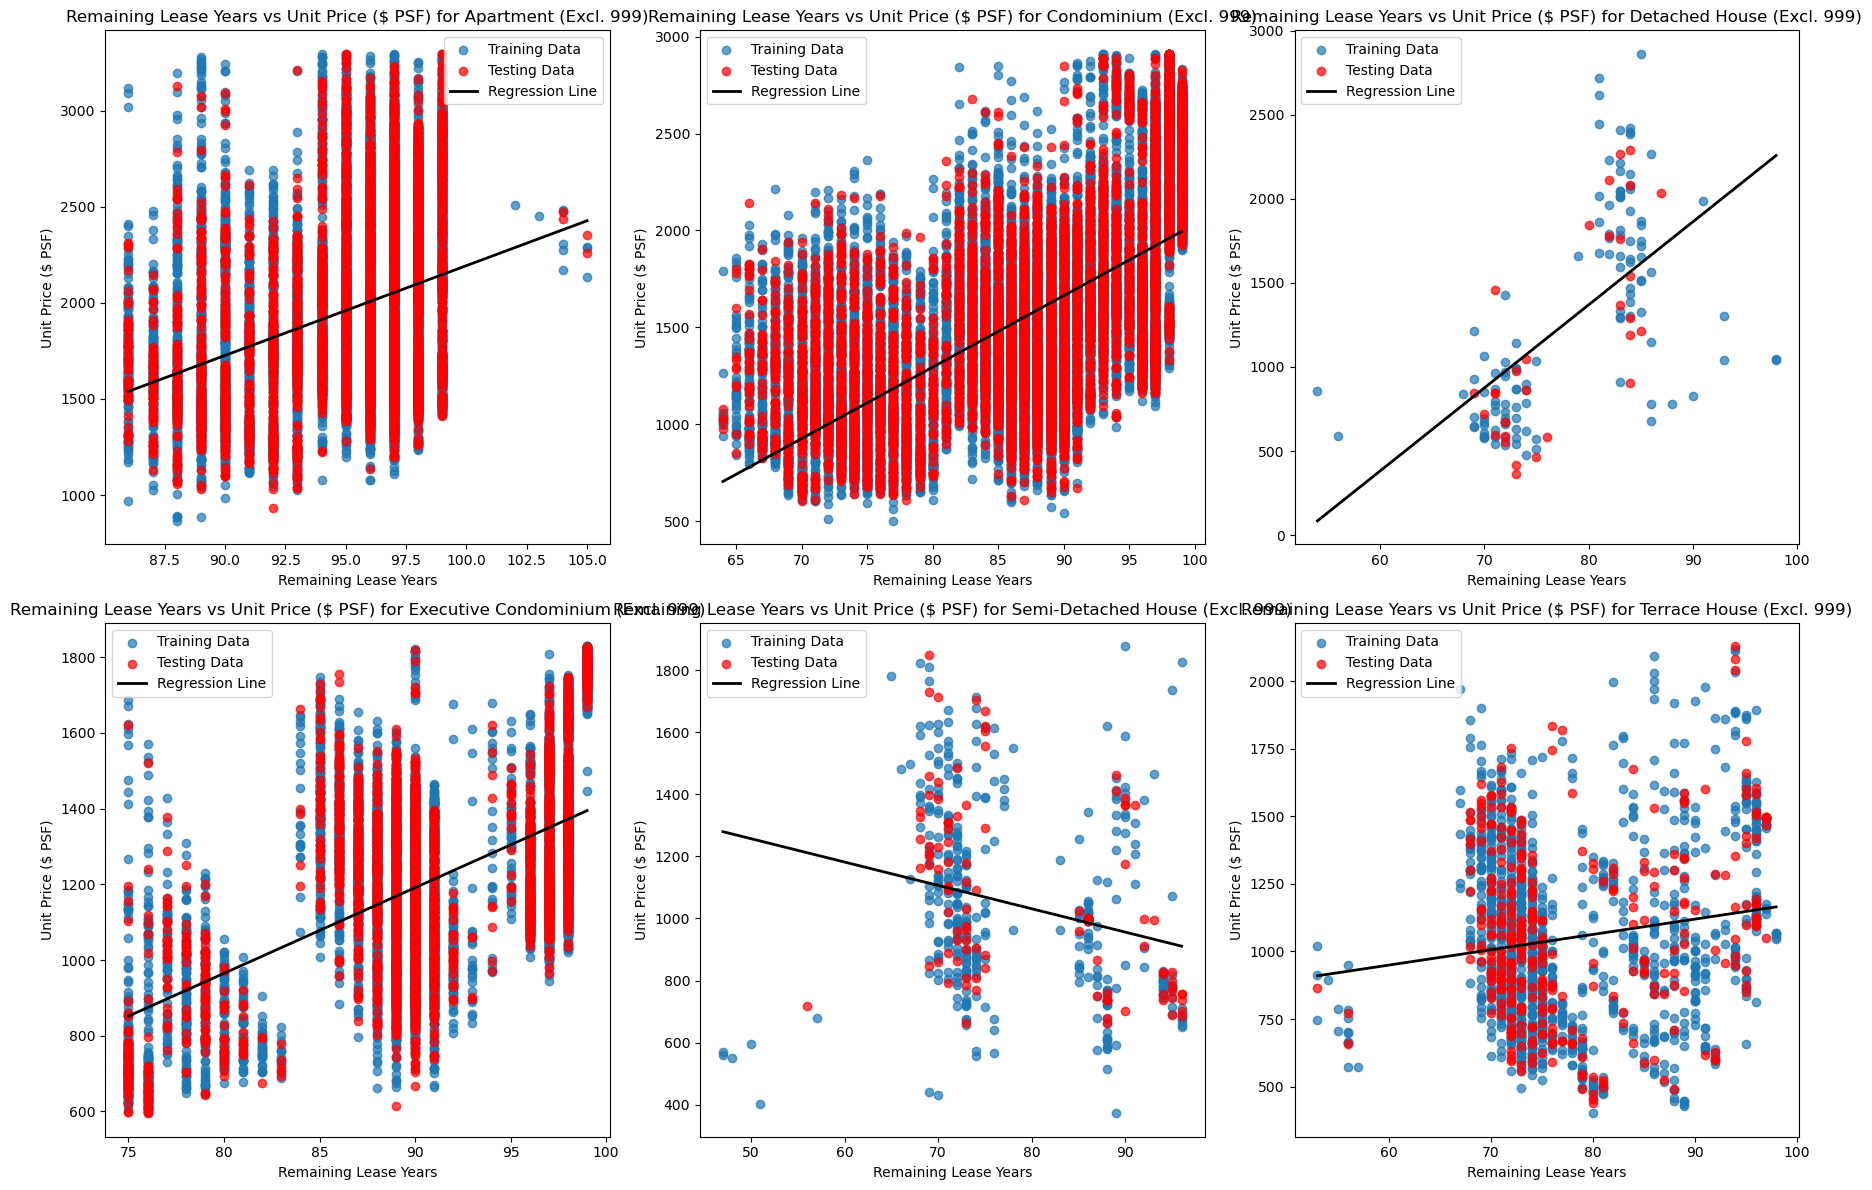


R² Scores for Each Property Type:
Apartment: R² = 0.0966
Condominium: R² = 0.3941
Detached House: R² = 0.3664
Executive Condominium: R² = 0.3036
Semi-Detached House: R² = 0.0597
Terrace House: R² = 0.0234


In [148]:

# Define property types to analyze
property_types = [
    "Apartment", "Condominium", "Detached House",
    "Executive Condominium", "Semi-Detached House", "Terrace House"
]

r2_scores = {}  # Dictionary to store R² values

# Create subplots (2 rows, 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()  # Flatten the axes array

for i, prop_type in enumerate(property_types):
    df1 = df[df['Property Type'] == prop_type].copy()

    # Remove rows where 'Remaining Lease Years' is 999
    df1 = df1[df1['Remaining Lease Years'] != 999]

    # Remove outliers
    df1_filtered = df1.copy()
    df1_filtered['Unit Price ($ PSF)'] = removeoutlier(df1_filtered['Unit Price ($ PSF)'])
    df1_filtered['Remaining Lease Years'] = removeoutlier(df1_filtered['Remaining Lease Years'])
    
    # Drop NaN values
    df1_filtered = df1_filtered.dropna(subset=['Unit Price ($ PSF)', 'Remaining Lease Years'])

    # Check if enough data remains after outlier removal
    if df1_filtered.shape[0] == 0:
        print(f"Not enough data for {prop_type} after outlier removal. Using original data.")
        df1_filtered = df1.copy().dropna(subset=['Unit Price ($ PSF)', 'Remaining Lease Years'])

    # Prepare training data
    area = df1_filtered[['Remaining Lease Years']]
    price = df1_filtered[['Unit Price ($ PSF)']]

    # Ensure no NaN values remain
    if area.isna().sum().sum() > 0 or price.isna().sum().sum() > 0:
        print(f"Skipping {prop_type} due to NaN values after cleaning.")
        continue

    # Ensure at least 2 rows for train-test split
    if area.shape[0] < 2:
        print(f"Skipping {prop_type} due to insufficient data.")
        continue

    # Train-test split
    area_train, area_test, price_train, price_test = train_test_split(area, price, test_size=0.2, random_state=42)

    # Train Linear Regression model
    linreg = LinearRegression()
    linreg.fit(area_train, price_train)

    r2_score = linreg.score(area_train, price_train)
    r2_scores[prop_type] = r2_score

    # Predictions for regression line
    area_range = np.linspace(area_train.min(), area_train.max(), 100).reshape(-1, 1)
    price_pred = linreg.predict(area_range)

    # Plot scatter and regression line
    ax = axes[i]
    ax.scatter(area_train, price_train, label="Training Data", alpha=0.7)
    ax.scatter(area_test, price_test, color="r", label="Testing Data", alpha=0.7)
    ax.plot(area_range, price_pred, color="black", linewidth=2, label="Regression Line")

    # Set labels and title
    ax.set_xlabel("Remaining Lease Years")
    ax.set_ylabel("Unit Price ($ PSF)")
    ax.set_title(f"Remaining Lease Years vs Unit Price ($ PSF) for {prop_type} (Excl. 999)")
    ax.legend()

plt.tight_layout()
plt.show()

# Print R² scores
print("\nR² Scores for Each Property Type:")
for prop_type, r2 in r2_scores.items():
    print(f"{prop_type}: R² = {r2:.4f}")
